# A simple decoding example

Written by Ladislas Nalborczyk (ladislas.nalborczyk@gmail.com)  
Last updated on February 1, 2024

In [7]:
# !yes | pip uninstall meg_decoding_tools
! pip install git+https://github.com/lnalborczyk/meg_decoding_tools
! pip install git+https://github.com/mitchellostrow/DSA

Found existing installation: meg_decoding_tools 0.0.1
Uninstalling meg_decoding_tools-0.0.1:
  Would remove:
    /Users/ladislas/Desktop/meg_decoding_tools/.venv/lib/python3.10/site-packages/meeg/*
    /Users/ladislas/Desktop/meg_decoding_tools/.venv/lib/python3.10/site-packages/meg_decoding_tools-0.0.1.dist-info/*
Proceed (Y/n)?   Successfully uninstalled meg_decoding_tools-0.0.1
yes: stdout: Broken pipe
  Cloning https://github.com/lnalborczyk/meg_decoding_tools to /private/var/folders/yp/p14xyqpj5l3bnhqhhfk5qhqr0000gn/T/pip-req-build-_y3vuarb
  Running command git clone --filter=blob:none --quiet https://github.com/lnalborczyk/meg_decoding_tools /private/var/folders/yp/p14xyqpj5l3bnhqhhfk5qhqr0000gn/T/pip-req-build-_y3vuarb
  Resolved https://github.com/lnalborczyk/meg_decoding_tools to commit 5f444958ad8e1763ac40ec707bf274938762ea7a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel 

In [10]:
import mne
import numpy as np
from meeg.decoding import time_decode
from meeg.decoding import prep_data_for_decoding

In [11]:
# importing the examplary data (MNE epochs of MEG data)
visual_4l2s = mne.read_epochs("../src/meeg/data/visual_4l2s.fif")
visual_7l2s = mne.read_epochs("../src/meeg/data/visual_7l2s.fif")

Reading /Users/ladislas/Desktop/meg_decoding_tools/examples/../src/meeg/data/visual_4l2s.fif ...


    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available


/var/folders/yp/p14xyqpj5l3bnhqhhfk5qhqr0000gn/T/ipykernel_47648/4242138223.py:2: RuntimeWarning: This filename (../src/meeg/data/visual_4l2s.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  visual_4l2s = mne.read_epochs("../src/meeg/data/visual_4l2s.fif")


Adding metadata with 13 columns
160 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/ladislas/Desktop/meg_decoding_tools/examples/../src/meeg/data/visual_7l2s.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Adding metadata with 13 columns
159 matching events found


/var/folders/yp/p14xyqpj5l3bnhqhhfk5qhqr0000gn/T/ipykernel_47648/4242138223.py:3: RuntimeWarning: This filename (../src/meeg/data/visual_7l2s.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  visual_7l2s = mne.read_epochs("../src/meeg/data/visual_7l2s.fif")


No baseline correction applied
0 projection items activated


In [12]:
# for decoding, we'll keep only two categories and concatenate those
decoding_epochs = mne.concatenate_epochs(
    epochs_list=[visual_4l2s, visual_7l2s],
    add_offset=True, on_mismatch="raise", verbose=None
    )

# preparing MNE epochs and labels for decoding
X, y = prep_data_for_decoding(
    epochs=decoding_epochs,
    pca=True, n_components=60,
    moving_average=True, kernel_size=5,
    trials_averaging=False, ntrials=2, shuffling_or_not=True
)

Adding metadata with 13 columns
319 matching events found
No baseline correction applied
Original shape of the MEG data: (319, 306, 251)
Length of the labels to be predicted: 319


/Users/ladislas/Desktop/meg_decoding_tools/.venv/lib/python3.10/site-packages/meeg/decoding/prepare.py:170: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = epochs.get_data()


Moving average applied with kernel size: 5
PCA explained variance:0.989


In [13]:
# decoding time!
scores, time_decod = time_decode(meg_data=X, labels=y, verbose=False)

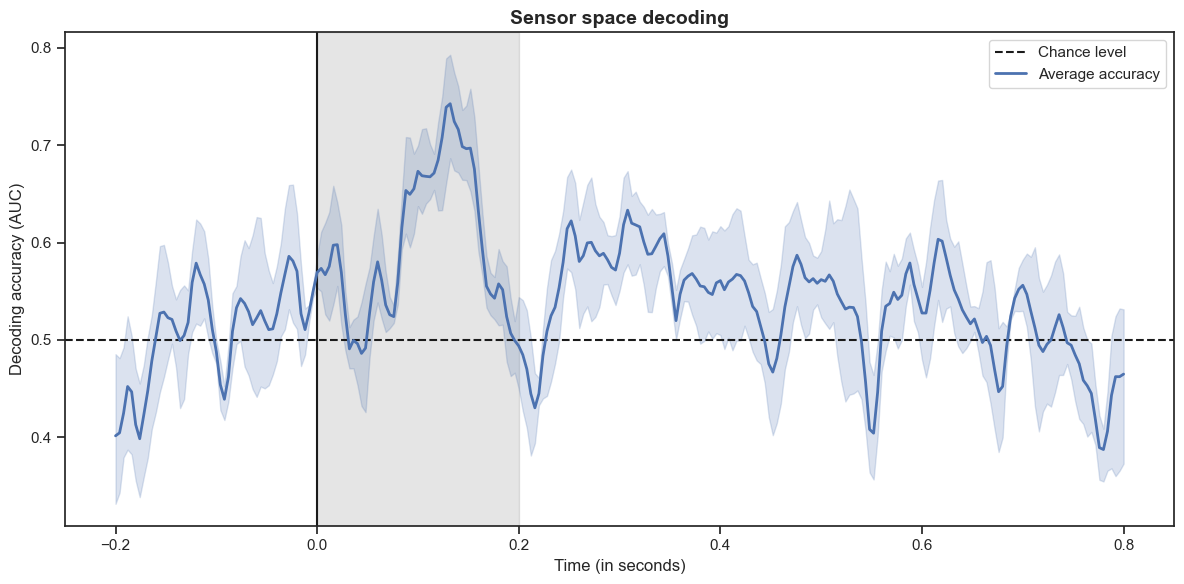

In [14]:
from meeg.plots import plotting_decoding_scores

# plotting the decoding accuracy over time
plotting_decoding_scores(
    decoding_scores=scores,
    x_ticks=decoding_epochs.times,
    end_stim=0.2,
    plot_title="Sensor space decoding"
)